In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_df = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv", sep = ",")

In [3]:
display(insurance_df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Data Manipulation**

In [4]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Label Encoder**

In [5]:
# Drop the duplicates from Insurance
insurance_df['sex'].drop_duplicates()

0    female
1      male
Name: sex, dtype: object

In [6]:
insurance_df['region'].drop_duplicates() 

0    southwest
1    southeast
3    northwest
8    northeast
Name: region, dtype: object

In [7]:
insurance_df['smoker'].drop_duplicates()

0    yes
1     no
Name: smoker, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
# Training the LabelEncoder with unique values for transformation of categorical values into 0, 1, 2, 3, 4...
le.fit(insurance_df['sex'].drop_duplicates())
insurance_df['sex'] = le.transform(insurance_df['sex'])

In [10]:
insurance_df 

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [11]:
le.fit(insurance_df['smoker'].drop_duplicates())
insurance_df['smoker'] = le.transform(insurance_df['smoker'])

In [12]:
le.fit(insurance_df['region'].drop_duplicates())
insurance_df['region'] = le.transform(insurance_df['region'])

In [13]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


**EDA**

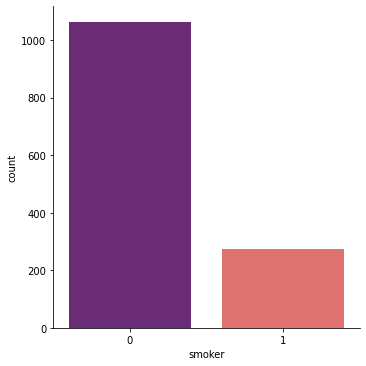

In [14]:
sns.catplot(x = 'smoker', kind = 'count', data = insurance_df, palette='magma')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


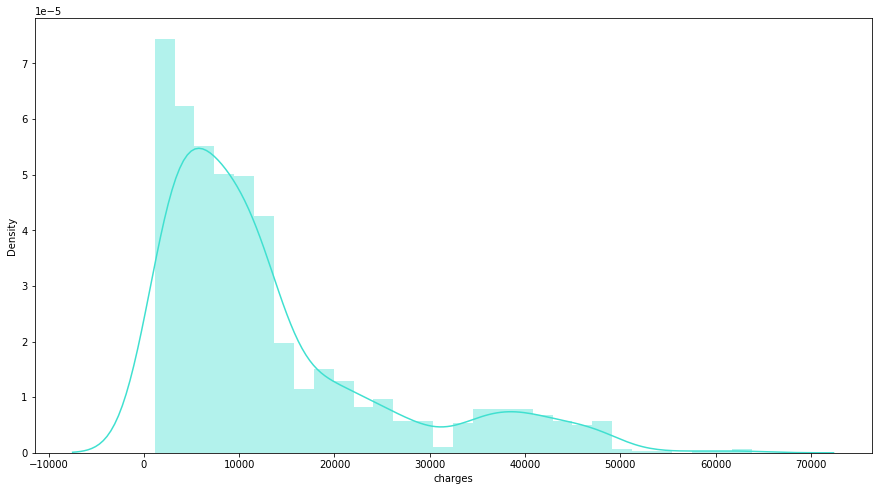

In [15]:
# Positive Skewness

plt.figure(figsize = (15,8))
sns.distplot(insurance_df['charges'], color = 'turquoise')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


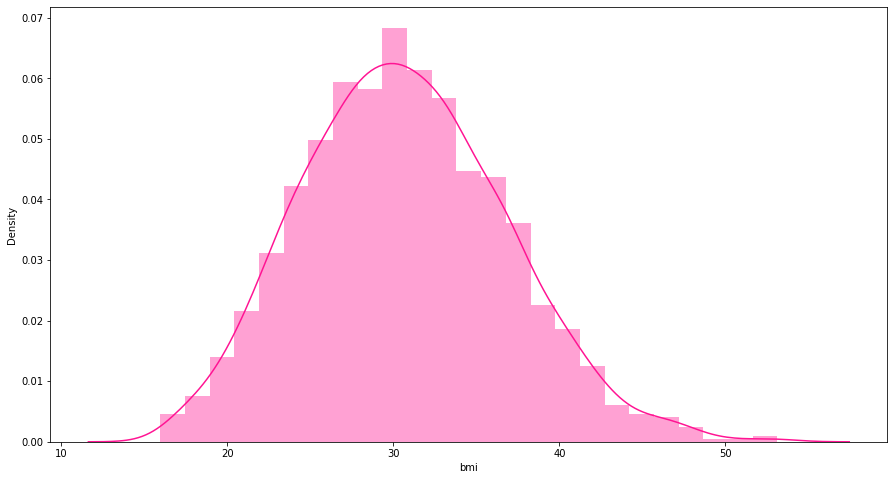

In [18]:
# Normal Distribution
plt.figure(figsize = (15,8))
sns.distplot(insurance_df['bmi'], color = 'deeppink')

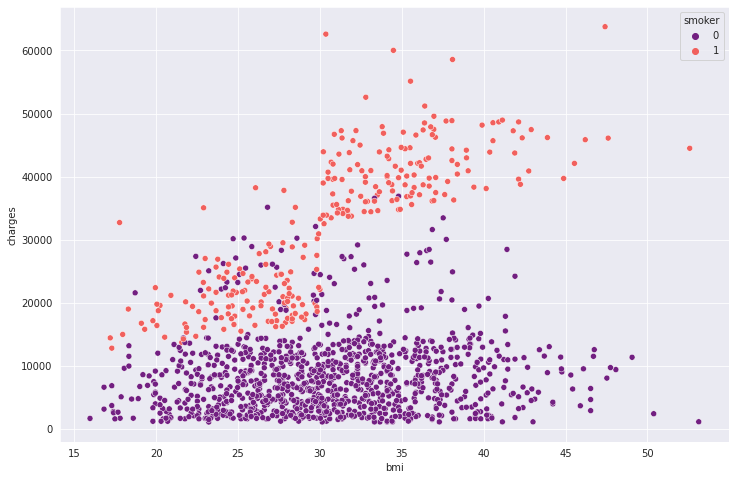

In [19]:
sns.set_style('darkgrid') 
plt.figure(figsize=(12,8))

sns.scatterplot(x = 'bmi', y = 'charges', data = insurance_df, palette = 'magma', hue = 'smoker')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


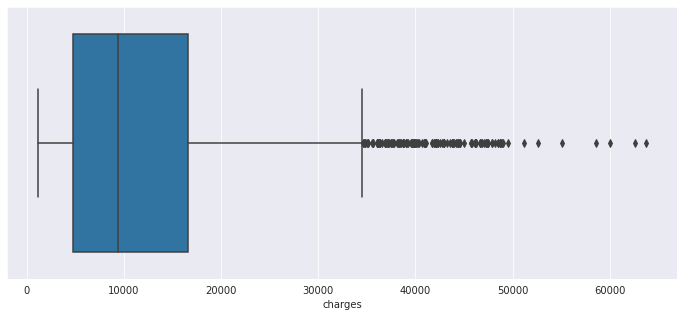

In [20]:
plt.figure(figsize=(12, 5))
sns.boxplot(insurance_df['charges']) 

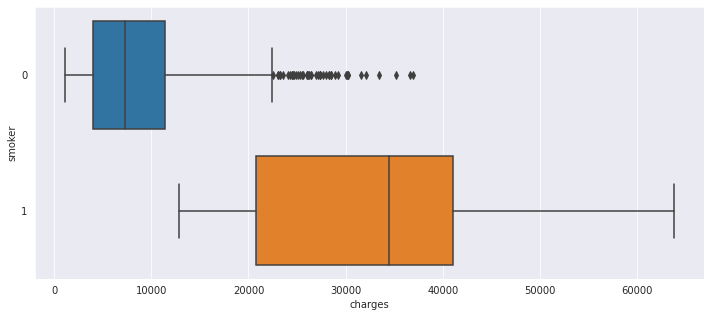

In [21]:
plt.figure(figsize=(12, 5))

sns.boxplot( x = insurance_df['charges'], y = 'smoker', data = insurance_df, orient= 'h') 

**Correlation**

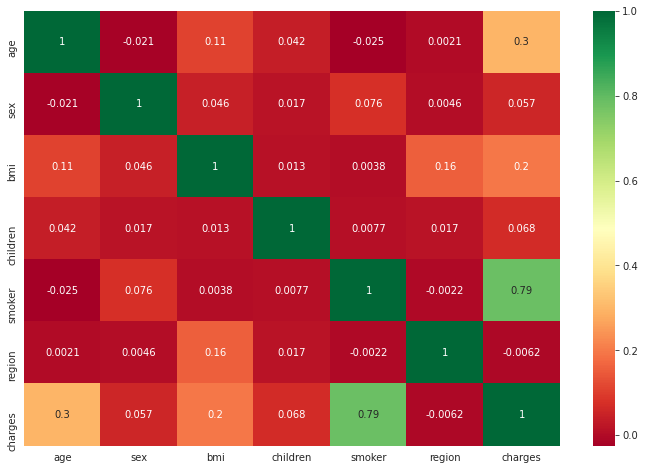

In [22]:
plt.figure(figsize = (12,8))
sns.heatmap(insurance_df.corr(), annot = True, cmap = 'RdYlGn')

**Split Train & Test**

In [23]:
X = insurance_df.drop('charges', axis = 1)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [24]:
Y = insurance_df['charges']

**Cross Validation**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [26]:
X_train.shape

(1070, 6)

In [27]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop

In [31]:
def build_model():
    # Sequential Neural Network
    model = Sequential()
    # units = no.of neurons, activation = 'relu', 
    # input_shape = No. of Features , no of columns, shape of image
    model.add(Dense(units = 128, activation='relu', input_shape = [len(X.keys())]))

    # Hidden Layer - I
    model.add(Dense(units = 256, activation='relu'))

    # Hidden Layer - II
    model.add(Dense(units = 512, activation='relu'))

    # Output Layers
    model.add(Dense(units = 1))

    # Optimizer
    optimizers = RMSprop(learning_rate=0.001)

    # Model Compiler
    model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics = ['mean_squared_error',
                                                                                  'mean_absolute_error'])

    return model

In [32]:
model = build_model()

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [35]:
# epochs = Number of Iterations
# batch_size = samples per iteration : 30 = number of samples per steps x 29 (steps per epoch)
# validation_split = 20% of X_train & Y_train : Testing the model after each epoch completed 
history = model.fit(X_train, Y_train, epochs = 600, batch_size = 30, validation_split = 0.2)

Epoch 1/600
29/29 [==============================] - 14s 23ms/step - loss: 308074758.4000 - mean_squared_error: 308074758.4000 - mean_absolute_error: 12528.3026 - val_loss: 239081168.0000 - val_mean_squared_error: 239081168.0000 - val_mean_absolute_error: 9760.1260
Epoch 2/600
29/29 [==============================] - 0s 5ms/step - loss: 154289649.6000 - mean_squared_error: 154289650.1333 - mean_absolute_error: 7707.8306 - val_loss: 143457840.0000 - val_mean_squared_error: 143457840.0000 - val_mean_absolute_error: 9600.4443
Epoch 3/600
29/29 [==============================] - 0s 5ms/step - loss: 122637605.8667 - mean_squared_error: 122637605.8667 - mean_absolute_error: 8735.5631 - val_loss: 142722768.0000 - val_mean_squared_error: 142722768.0000 - val_mean_absolute_error: 9678.6631
Epoch 4/600
29/29 [==============================] - 0s 5ms/step - loss: 122297329.6000 - mean_squared_error: 122297329.6000 - mean_absolute_error: 8979.0639 - val_loss: 146213808.0000 - val_mean_squared_erro

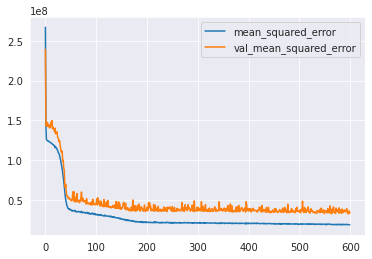

In [36]:
pd.DataFrame(history.history)[['mean_squared_error', 'val_mean_squared_error']].plot() 

**Predictions**

In [37]:
# Yhat
predictions = model.predict(X_test)

In [38]:
# MSE , MAE
model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 17502350.0000 - mean_squared_error: 17502350.0000 - mean_absolute_error: 2701.6328


[17502350.0, 17502350.0, 2701.6328125]

In [40]:
# r2 = R-Squared : Coefficient of Determination : Variance of Predicted O/P (Yhat) vs Actual O/P
from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.890012232660274

In [41]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(6, 128) dtype=float32, numpy=
 array([[-1.40324548e-01,  9.08959098e-03, -9.21732336e-02,
         -2.04023793e-01, -5.13741001e-03, -1.81942970e-01,
         -6.87261075e-02,  3.45804803e-02,  1.50158256e-02,
         -2.04770610e-01, -1.74588221e-03, -1.75594464e-02,
          1.13332413e-01, -3.58656943e-02, -3.21062631e-03,
         -3.48164677e-03, -1.78160459e-01,  5.61966887e-03,
         -1.45074129e-01, -1.50142565e-01, -3.27052884e-02,
          6.19871020e-02,  8.88712406e-02, -2.48784199e-02,
         -1.11528644e-02, -5.49072511e-02, -6.16228133e-02,
         -1.45607382e-01,  2.85981782e-02, -7.65805542e-02,
          9.36642438e-02, -2.01756507e-01,  2.82743312e-02,
          8.08831602e-02,  5.43789640e-02,  3.31126228e-02,
         -1.14850149e-01, -1.91214643e-02,  1.01657540e-01,
         -8.04226771e-02, -1.31934017e-01, -6.49615675e-02,
          1.74537763e-01, -2.00453177e-01, -4.85610552e-02,
          4.60621938e-02, -4.4